# Build a CNN with a VGG block

Import prerequesists

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from keras_preprocessing.image import ImageDataGenerator
import os, sys

Specify train and test image set paths

In [2]:
train_set_path = 'petImages/train/'
test_set_path = 'petImages/test/'

Function to create a CNN with single VGG blacok

In [3]:
# define cnn model 
# Input shape = (200, 200)
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

Function to evaluate Cross Entropy Loss and Classification Accuracy

In [14]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #plt.savefig(filename + '_plot.png')
    plt.show()
    plt.close()

Image Data Generator with rescaling images

In [5]:
# Data generator, same generator for train set and test set
data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_gen = data_gen.flow_from_directory(train_set_path,
                                        class_mode='binary',
                                        batch_size=64,
                                        target_size=(200, 200))

test_gen = data_gen.flow_from_directory(test_set_path,
                                        class_mode='binary',
                                        batch_size=64,
                                        target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6301 images belonging to 2 classes.


Train Model and evaluate

In [6]:
# Train a model
model = define_model()

history = model.fit(train_gen, 
                    steps_per_epoch=len(train_gen),
                    validation_data=test_gen, 
                    validation_steps=len(test_gen), 
                    epochs=20, 
                    verbose=1)



C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
136/293 [============>.................] - ETA: 2:31 - loss: 0.7564 - accuracy: 0.5594

C:\ProgramData\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


293/293 [==============================] - 320s 1s/step - loss: 0.7002 - accuracy: 0.5891 - val_loss: 0.6355 - val_accuracy: 0.6280
Epoch 2/20
293/293 [==============================] - 328s 1s/step - loss: 0.6414 - accuracy: 0.6239 - val_loss: 0.6348 - val_accuracy: 0.6307
Epoch 3/20
293/293 [==============================] - 343s 1s/step - loss: 0.6251 - accuracy: 0.6422 - val_loss: 0.6304 - val_accuracy: 0.6345
Epoch 4/20
293/293 [==============================] - 332s 1s/step - loss: 0.6200 - accuracy: 0.6473 - val_loss: 0.6147 - val_accuracy: 0.6607
Epoch 5/20
293/293 [==============================] - 336s 1s/step - loss: 0.6035 - accuracy: 0.6601 - val_loss: 0.6122 - val_accuracy: 0.6508
Epoch 6/20
293/293 [==============================] - 326s 1s/step - loss: 0.5988 - accuracy: 0.6729 - val_loss: 0.6001 - val_accuracy: 0.6723
Epoch 7/20
293/293 [==============================] - 324s 1s/step - loss: 0.5886 - accuracy: 0.6762 - val_loss: 0.6003 - val_accuracy: 0.6718
Epoch 8/20

NameError: name 'pyplot' is not defined

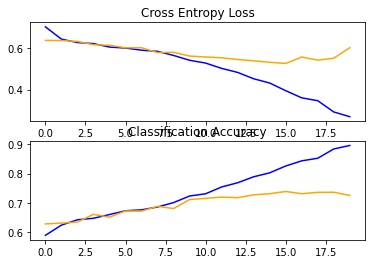

In [15]:
summarize_diagnostics(history)